In [1]:
#Part II: Decision Trees

import pandas as pd
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
# Preprocessing

df = df.drop(['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class'], axis=1)

In [5]:
df = df.dropna(subset=['age', 'embarked', 'embarked', 'sex'])
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [7]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [8]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,0,22.0,1,0,7.2500,0,False
1,1,1,1,38.0,1,0,71.2833,1,False
2,1,3,1,26.0,0,0,7.9250,0,True
3,1,1,1,35.0,1,0,53.1000,0,False
4,0,3,0,35.0,0,0,8.0500,0,True


In [9]:
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((569, 8), (143, 8), (569,), (143,))

In [10]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

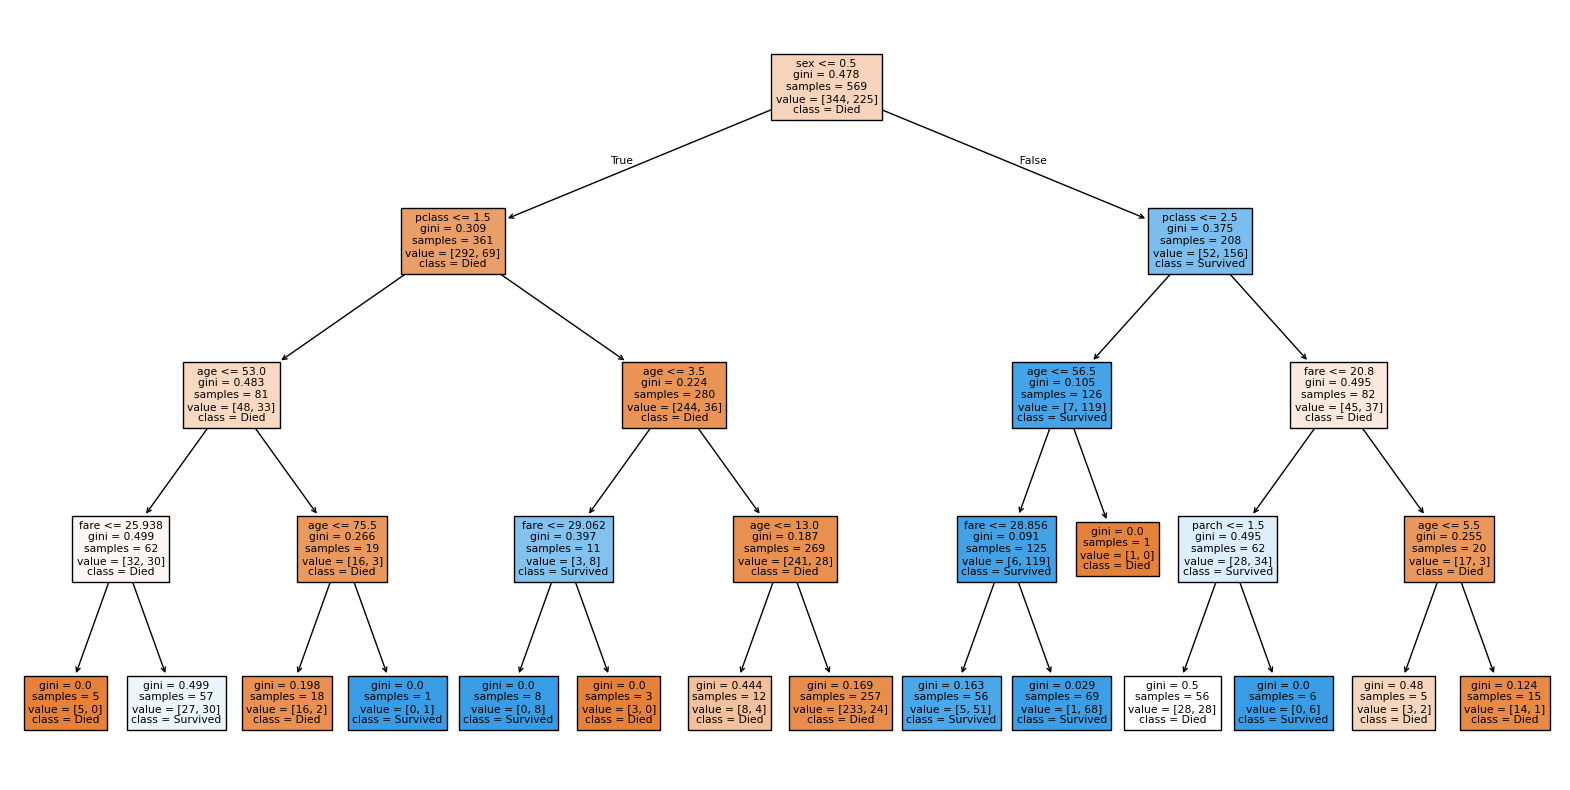

In [11]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)
plt.show()

In [12]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:\n", cm)


Accuracy: 0.6853
Confusion Matrix:
 [[66 14]
 [31 32]]


In [13]:
# Task 6: Model Tuning
# using depth ranges
train_accuracies = []
test_accuracies = []
depth_range = range(1, 21) 

for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=10, random_state=42)
    clf.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)


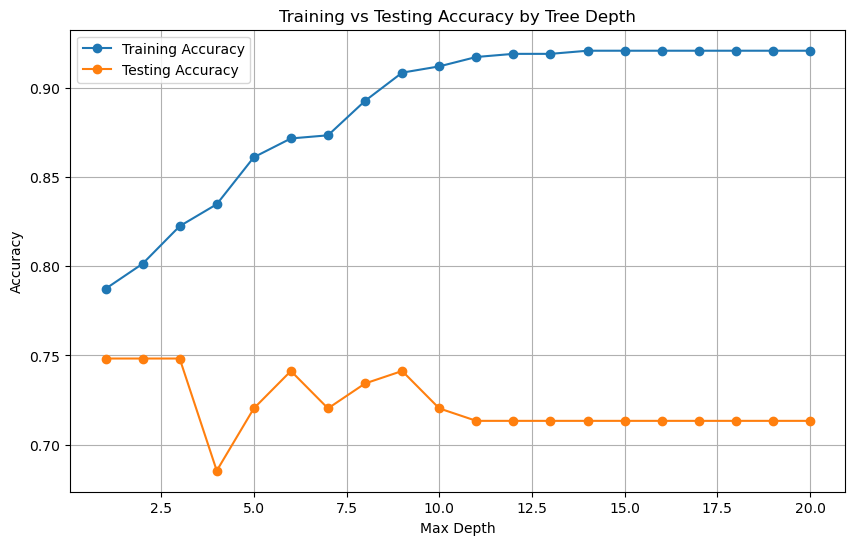

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(depth_range, test_accuracies, marker='o', label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy by Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# using min_samples_split
split_values = [2, 5, 10, 20, 30, 40, 50]
train_accuracies = []
test_accuracies = []

for split in split_values:
    clf = DecisionTreeClassifier(max_depth=5, min_samples_split=split, random_state=42)
    clf.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

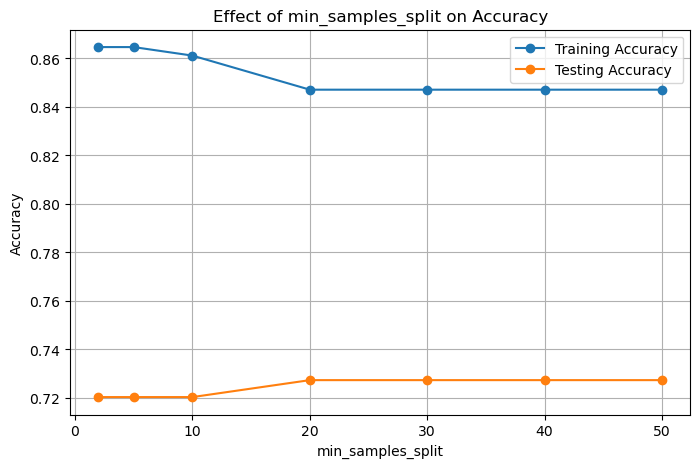

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(split_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(split_values, test_accuracies, marker='o', label='Testing Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Effect of min_samples_split on Accuracy')
plt.legend()
plt.grid(True)
plt.show()